# Spotify Recommendation Dataset

The "Spotify Recommendation dataset" is like a big list that keeps track of songs and what people do on Spotify, like what songs they listen to and what playlists they make. It has 15 different details about songs, including things like how danceable a song is, how much energy it has, and its speed. It also shows what users like and do on Spotify. This list helps make smart guesses about which songs someone might like based on what they usually listen to. It's really important for making Spotify and other music apps better at suggesting songs people will like. Scientists and experts who study data use this list to help improve music recommendations.

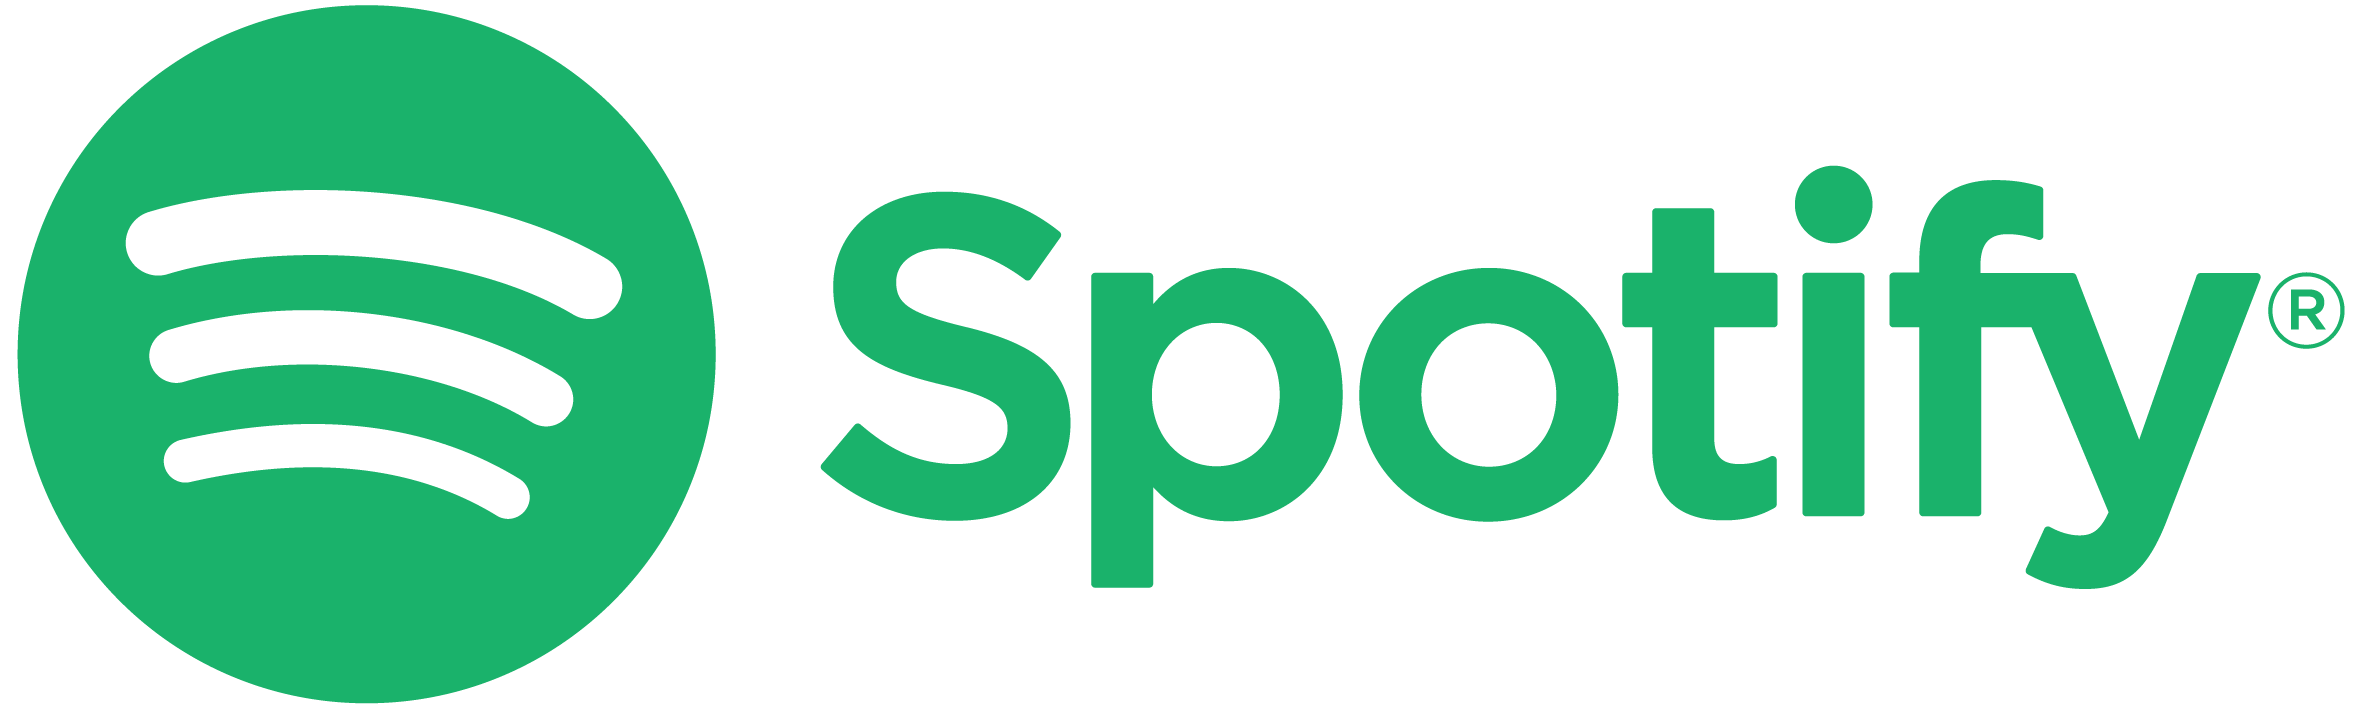

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
spotify_df = pd.read_csv('C:/Code/Spotify/data.csv')
spotify_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


## Understanding Data
* danceability: How suitable is the track for dancing, ranging from 0 to 1.
* energy: Describes energetic the song is, ranging from 0 to 1.
* key: The key the track is in.
* loudness: Describes how loud the song is
* Mode: Detects Major or Minor of the track
* speechiness: Detects the precense of spoken words, ranging from 0 to 1.
* acousticness: whether a track is acoustic or not
* instrumentalness: Predicts whether a track contains no vocals
* liveness: Measures how likely the song was recorded live, ranging from 0 to 1.
* valence: Musical positiveness conveyed by a track, ranging from 0 to 1.
* tempo: tempo of the song, in beats per minute.
* duration_ms: Duration of the song, in milliseconds.
* time_signature: Indicates number of beats per measure
* liked: whether a song is liked or not

In [3]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [4]:
with open('C:/Code/Spotify/good.json', 'r') as f:
    data = json.load(f)
pd.DataFrame(data['audio_features'])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,audio_features,55mcupbf7cIsuCEVAuTJVk,spotify:track:55mcupbf7cIsuCEVAuTJVk,https://api.spotify.com/v1/tracks/55mcupbf7cIs...,https://api.spotify.com/v1/audio-analysis/55mc...,111000,4
1,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,audio_features,57RtLWT7IpugV0yi5bsxJk,spotify:track:57RtLWT7IpugV0yi5bsxJk,https://api.spotify.com/v1/tracks/57RtLWT7Ipug...,https://api.spotify.com/v1/audio-analysis/57Rt...,169347,4
2,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,audio_features,5VyfAfp2Yt3qaeuvq55ll3,spotify:track:5VyfAfp2Yt3qaeuvq55ll3,https://api.spotify.com/v1/tracks/5VyfAfp2Yt3q...,https://api.spotify.com/v1/audio-analysis/5Vyf...,230854,4
3,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,audio_features,3eWHY75nDgte70hh5yf4UW,spotify:track:3eWHY75nDgte70hh5yf4UW,https://api.spotify.com/v1/tracks/3eWHY75nDgte...,https://api.spotify.com/v1/audio-analysis/3eWH...,224029,4
4,0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,audio_features,2UwrB6Ge6mPfUV8yGvAfX7,spotify:track:2UwrB6Ge6mPfUV8yGvAfX7,https://api.spotify.com/v1/tracks/2UwrB6Ge6mPf...,https://api.spotify.com/v1/audio-analysis/2Uwr...,102353,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.616,0.534,10,-10.264,0,0.4830,0.6390,0.000000,0.0844,0.556,170.054,audio_features,3dl4lXWlOxnGo94OqNtpdq,spotify:track:3dl4lXWlOxnGo94OqNtpdq,https://api.spotify.com/v1/tracks/3dl4lXWlOxnG...,https://api.spotify.com/v1/audio-analysis/3dl4...,146480,4
96,0.802,0.549,5,-8.600,0,0.0631,0.2680,0.004960,0.0984,0.498,138.984,audio_features,3DWDcsDoXRIFynCREIkibM,spotify:track:3DWDcsDoXRIFynCREIkibM,https://api.spotify.com/v1/tracks/3DWDcsDoXRIF...,https://api.spotify.com/v1/audio-analysis/3DWD...,184627,4
97,0.767,0.659,7,-4.541,1,0.0387,0.7850,0.000000,0.1120,0.631,90.056,audio_features,6fmtZEUoGwxPNvUgr0NJm1,spotify:track:6fmtZEUoGwxPNvUgr0NJm1,https://api.spotify.com/v1/tracks/6fmtZEUoGwxP...,https://api.spotify.com/v1/audio-analysis/6fmt...,186720,4
98,0.752,0.468,0,-9.966,1,0.3330,0.8050,0.000000,0.1360,0.716,82.795,audio_features,2edc1m7WXxdBA61WlxSInp,spotify:track:2edc1m7WXxdBA61WlxSInp,https://api.spotify.com/v1/tracks/2edc1m7WXxdB...,https://api.spotify.com/v1/audio-analysis/2edc...,179253,4


In [5]:
spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [6]:
spotify_df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [7]:
spotify_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


Displays all the column names present in the dataset

In [8]:
spotify_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

No. of rows & columns in the dataset

In [9]:
spotify_df.shape

(195, 14)

Counting number of occurrences in liked column

In [10]:
spotify_df['liked'].value_counts()
# 1 --> Like
# 0 --> Dislike

liked
1    100
0     95
Name: count, dtype: int64

Check if there are any null values

In [11]:
spotify_df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

# 1. Exploratory Data Analysis

Function DrawHistogram which takes a column name as input and creates a histogram using the seaborn library to visualize the distribution of values for that column in the "spotify_df" dataset. The function is then called for each feature in the "features" list using a for loop, resulting in a series of histograms being displayed for each feature. The purpose of this code is to provide a visual understanding of the distribution of the various features in the dataset, which can help identify any patterns or outliers that may be useful for modeling and analysis.

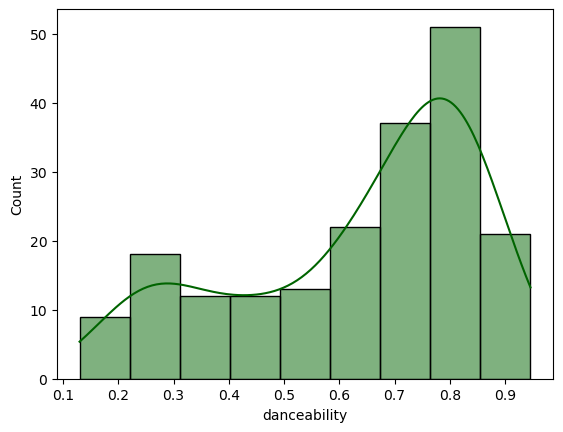

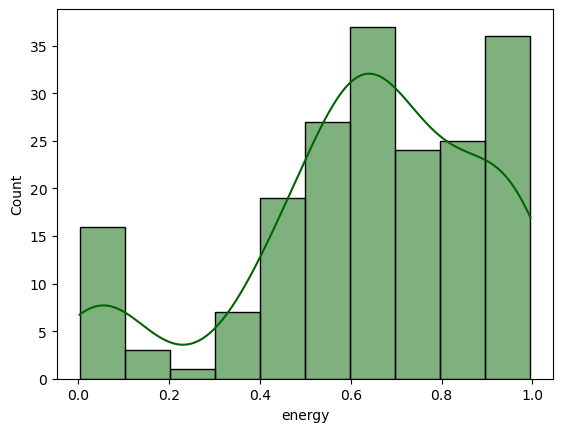

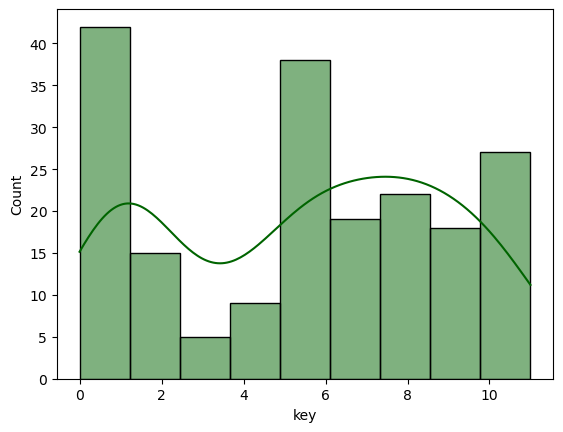

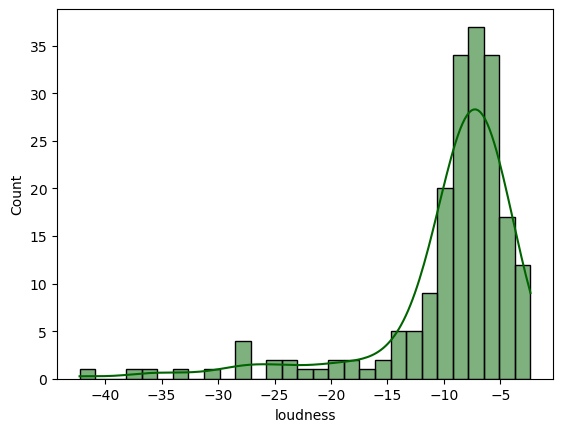

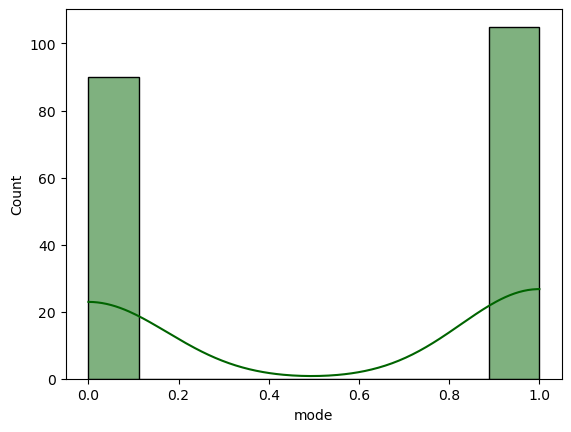

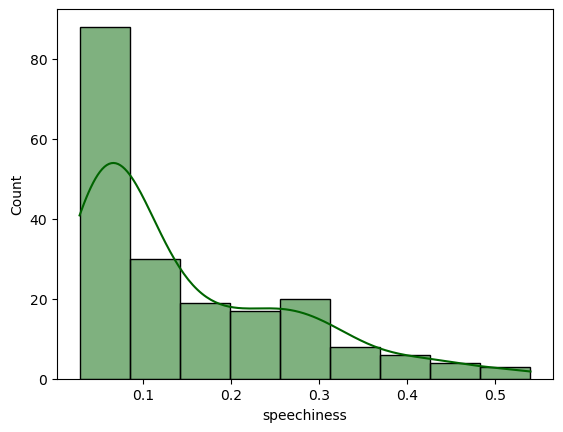

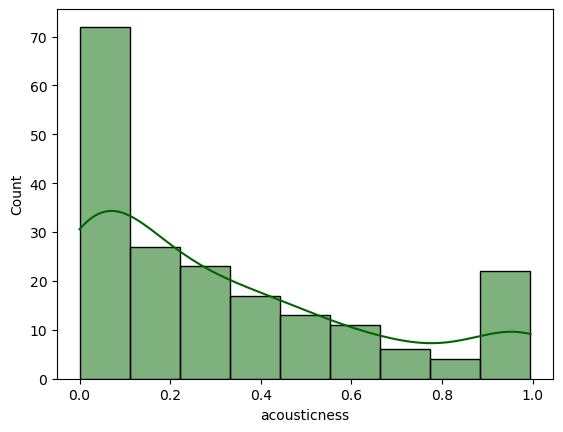

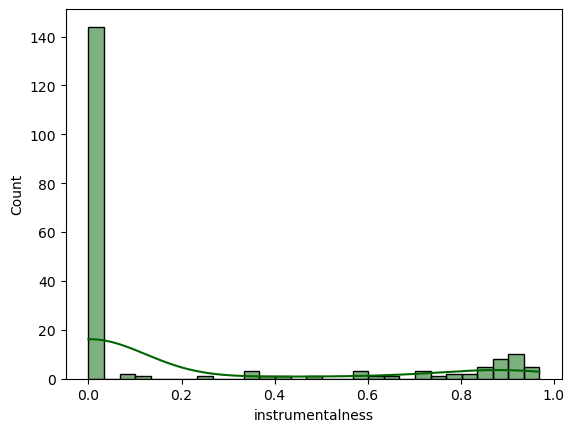

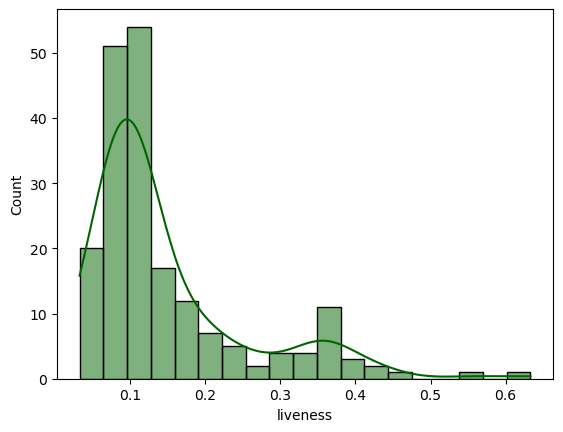

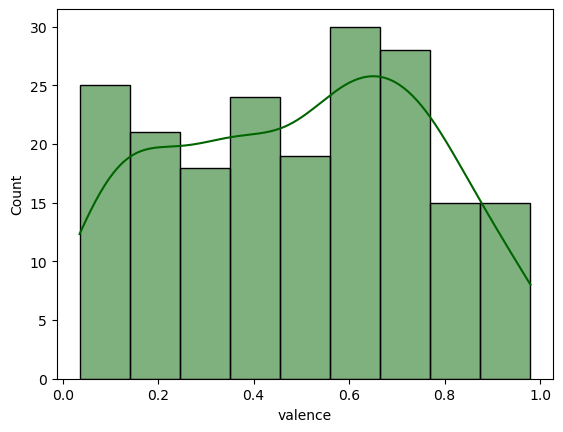

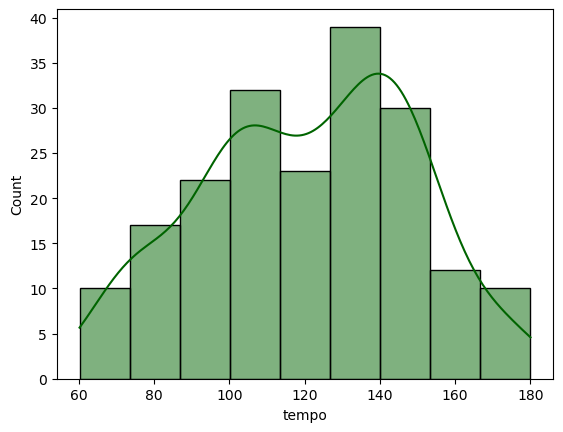

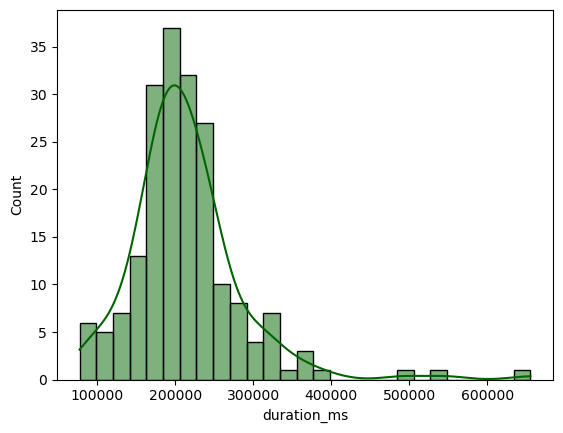

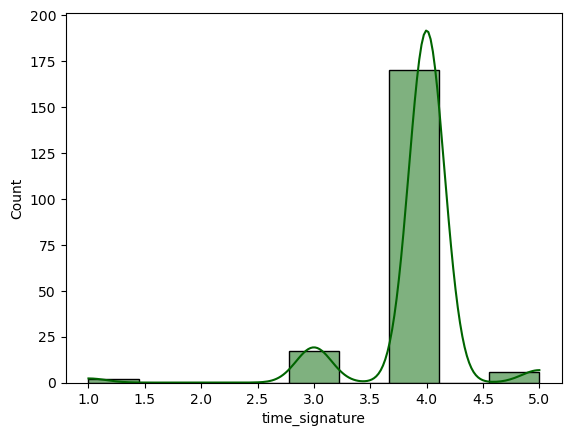

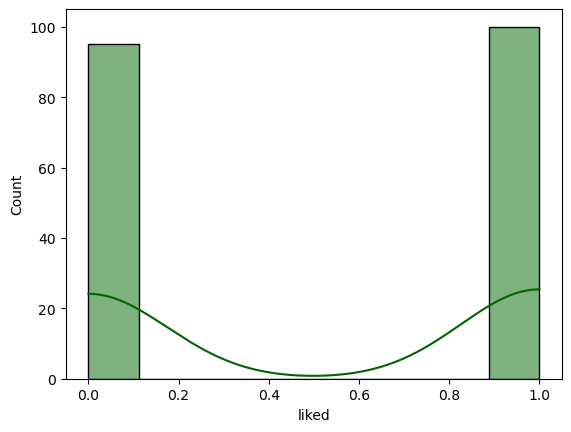

In [12]:
column_name = ""
def DrawHistogram(column_name):
    sns.histplot(data=spotify_df,x=column_name, kde=True, color='darkgreen')
    plt.show()
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms', 'time_signature', 'liked']
for i in features:
    DrawHistogram(i)

## 1.1 Like vs Dislike count
countplot can be useful for understanding the proportion of songs that users tend to like and for identifying any imbalances in the dataset that may need to be addressed during modeling and analysis.

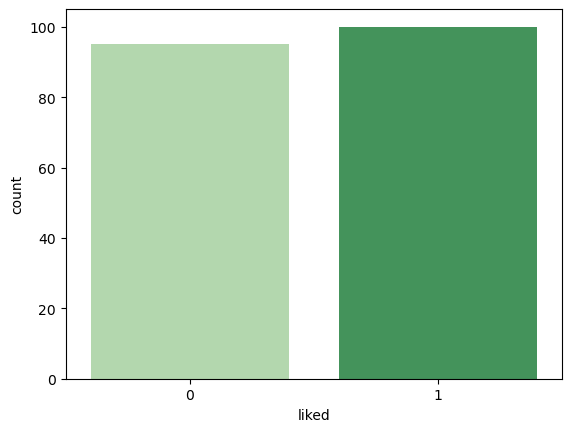

In [13]:
sns.countplot(data=spotify_df, x='liked', palette="Greens")
plt.show()

## 1.2 Co-relation matrix
The output is typically presented in a matrix format, with each cell representing the correlation coefficient between two features. The diagonal line of the matrix is always 1 since it represents the correlation between a feature and itself. The matrix can be visualized as a heatmap, with high correlation coefficients represented by brighter colors and low or negative correlation coefficients represented by darker colors.

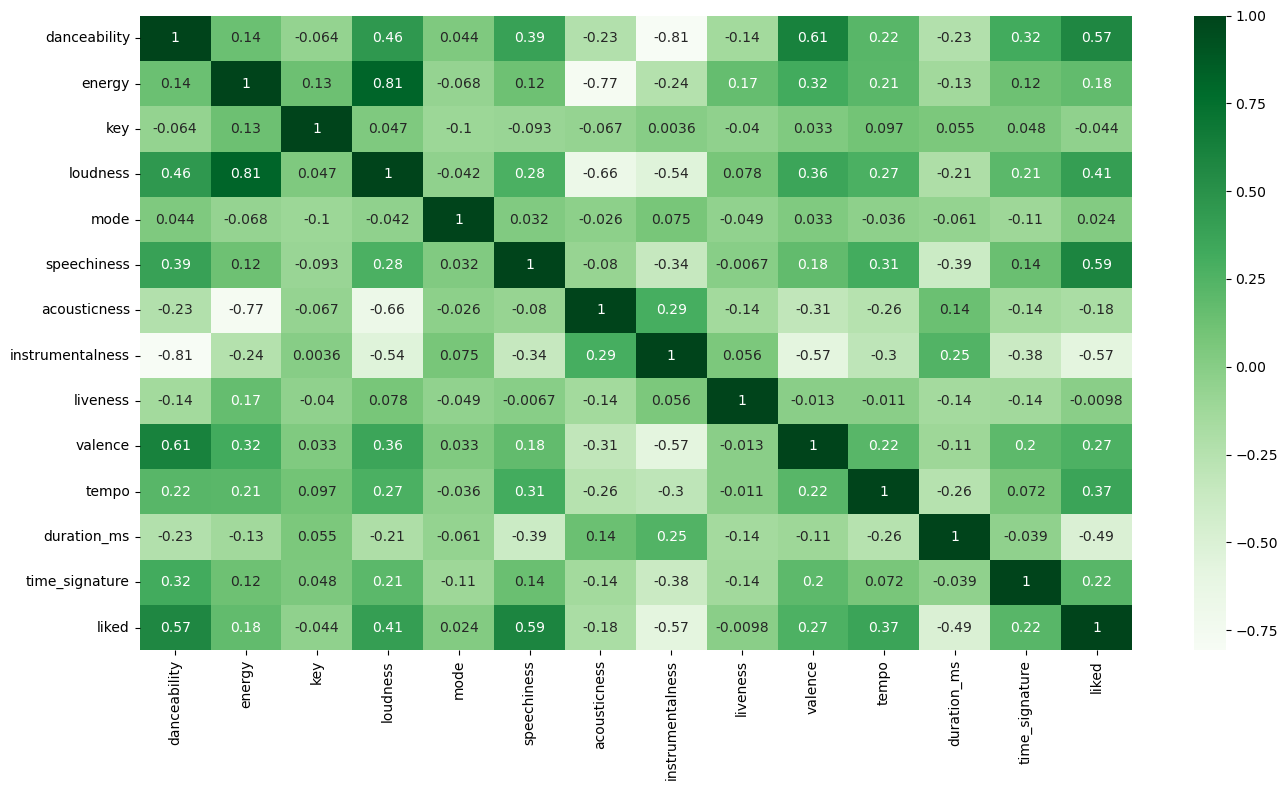

In [14]:
plt.figure(figsize=(14, 8))
sns.heatmap(spotify_df.corr(), annot=True, cmap='Greens')
plt.tight_layout()
plt.show()

# 2. Feature Engineering

## 2.1 Duration of Song vs likes/dislikes 

From the resulting plot, it appears that the majority of songs in the dataset have a duration of less than 4 minutes.

In the context of music, a duration of less than 4 minutes is relatively short, especially compared to classical or instrumental music where pieces can often be much longer. This information could be useful for understanding the preferences of listeners in the dataset and may also inform decisions related to song selection or playlist curation.

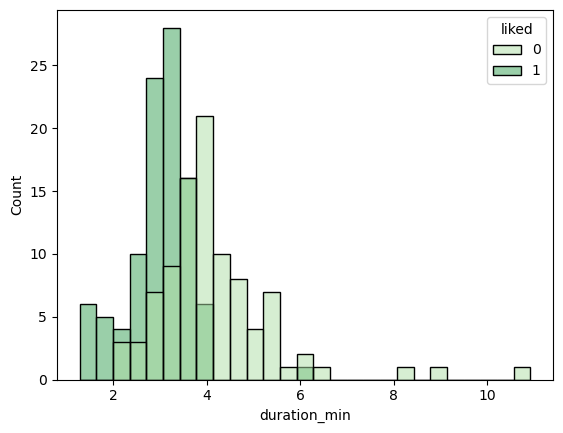

In [15]:
spotify_df['duration_min'] = spotify_df['duration_ms'] / 60000
sns.histplot(data=spotify_df, x='duration_min', palette="Greens", hue="liked")
plt.show()

## 2.2 More the Danceability more the likes! 
The "intensity" is a new variable created by multiplying the "loudness" and "tempo" variables for each song in the dataset. This new variable represents a measure of how "intense" the song is based on the combination of its loudness and tempo. The scatter plot shows that there is a general trend where tracks with higher danceability tend to have higher intensity scores as well and most likes. 

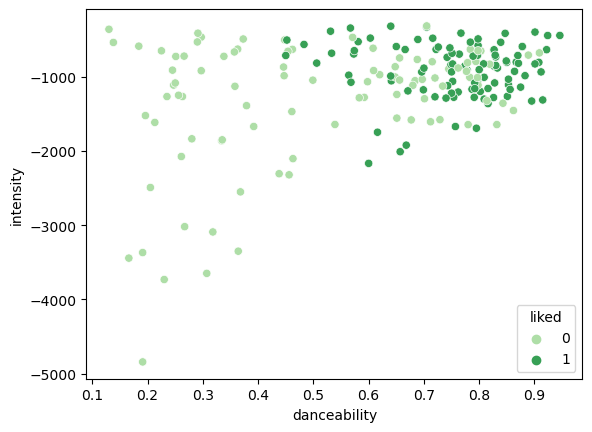

In [16]:
spotify_df['intensity'] = spotify_df['loudness'] * spotify_df['tempo']
sns.scatterplot(data=spotify_df, x='danceability', y='intensity', hue='liked', palette="Greens")
plt.show()

## 2.3 Generate the mood of the song

This code helps sort songs into different mood groups like sad, mellow, upbeat, and happy, based on the song's valence score, energy, and speed.

First, it sets up these mood groups and then uses a tool (pd.cut() function) to organize the 'valence' scores of songs into these groups.

Then, it adds two more mood groups, 'high energy' and 'fast-paced', for songs that are really energetic or fast. It updates the song list, marking which songs fit these new groups based on their energy and speed.

In the end, to show how the songs are spread across these mood groups, it makes a chart using the seaborn library and shows it with plt.show().

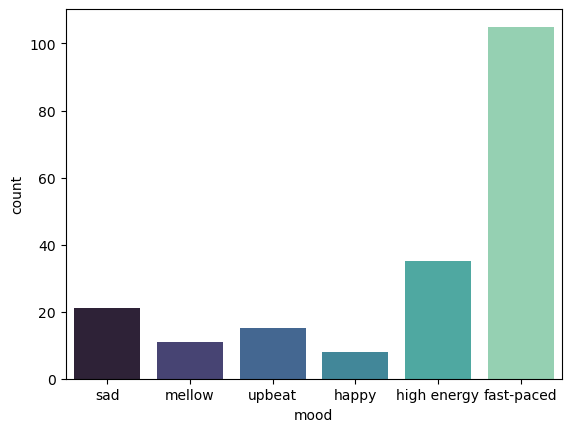

In [17]:
# Define categories for the mood variable
categories = ['sad', 'mellow', 'upbeat', 'happy']

# Create a categorical variable for the overall mood of the song
spotify_df['mood'] = pd.cut(
    x=spotify_df['valence'],
    bins=[0, 0.25, 0.5, 0.75, 1.0],
    labels=categories
)

# Add new categories to the mood variable
spotify_df['mood'] = spotify_df['mood'].cat.add_categories(['high energy', 'fast-paced'])
spotify_df.loc[spotify_df['energy'] >= 0.7, 'mood'] = 'high energy'
spotify_df.loc[spotify_df['tempo'] >= 120, 'mood'] = 'fast-paced'

# Print the value counts of each mood category
#print(spotify_df['mood'].value_counts())
sns.countplot(data=spotify_df, x='mood', palette="mako")
plt.show()


## 2.4 Identify the Genre of the song with KMeans Clustering (Unsupervised)

The code identifies genres in the Spotify dataset using KMeans clustering. It selects a subset of features, performs feature engineering, drops missing values, and applies KMeans clustering to the data to obtain genre cluster labels. The cluster labels are then mapped to genre names using a dictionary, and a countplot is created to visualize the distribution of genre names in the Spotify dataset.

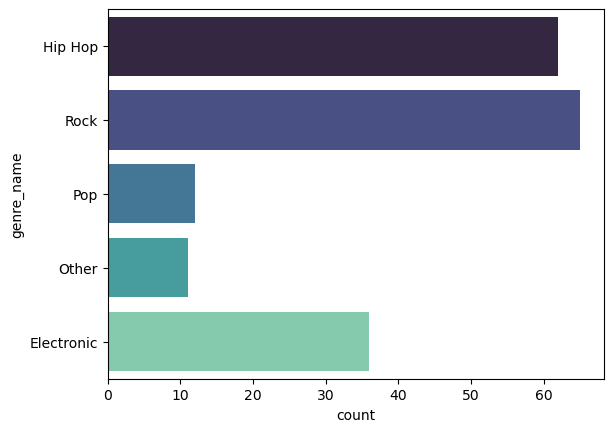

In [18]:
import pandas as pd
from sklearn.cluster import KMeans

# Select a subset of features for genre identification
features_temp = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
spotify_df_temp = spotify_df[features_temp]

# Perform feature engineering
spotify_df_temp['tempo_variance'] = spotify_df_temp['tempo'].rolling(window=10).var()
spotify_df_temp['speechiness_variance'] = spotify_df_temp['speechiness'].rolling(window=10).var()

# Drop any rows with missing values
spotify_df_temp = spotify_df_temp.dropna()

# Use KMeans clustering to identify genre clusters
X = spotify_df_temp.values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
spotify_df_temp['genre'] = kmeans.labels_

# Map genre cluster labels to genre names
genre_names = {0: 'Rock', 1: 'Pop', 2: 'Hip Hop', 3: 'Electronic', 4: 'Other'}
spotify_df_temp['genre_name'] = spotify_df_temp['genre'].apply(lambda x: genre_names[x])

# Print out the resulting genre names for each song
sns.countplot(data=spotify_df_temp, y='genre_name', palette="mako")
plt.show()

# 3 Machine Learning Models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
train_df, test_df = train_test_split(spotify_df, test_size=0.3, random_state=39)

## 3.1 Define the feature columns and target variable

In [20]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
target = 'liked'

Get the training and test data

In [21]:
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

## 3.2 Train and evaluate a logistic regression model

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print('Logistic Regression Accuracy: {0}%'.format(round(accuracy1*100,2)))
print('Logistic Regression Confusion Matrix:\n', conf_mat)

Logistic Regression Accuracy: 84.75%
Logistic Regression Confusion Matrix:
 [[19  3]
 [ 6 31]]


## 3.3 Train and evaluate a random forest model

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print('Random Forest Accuracy: {0}%'.format(round(accuracy2*100,2)))
print('Random Forest Confusion Matrix:\n', conf_mat)

Random Forest Accuracy: 84.75%
Random Forest Confusion Matrix:
 [[19  3]
 [ 6 31]]


## 3.4 Train and evaluate an XGBoost model

In [24]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print('XGBoost {0}%'.format(round(accuracy3*100,2)))
print('XGBoost Confusion Matrix:\n', conf_mat)

XGBoost 88.14%
XGBoost Confusion Matrix:
 [[20  2]
 [ 5 32]]


# 4. Deep Learning Model

In [25]:
import tensorflow as tf
from tensorflow import keras
# Define the neural network
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(len(features),), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)






2/2 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.7966
Test accuracy: 0.7966101765632629


In [26]:
loss, accuracy_dl = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy_dl)

2/2 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.7966
Test Loss: 0.6230673789978027
Test Accuracy: 0.7966101765632629


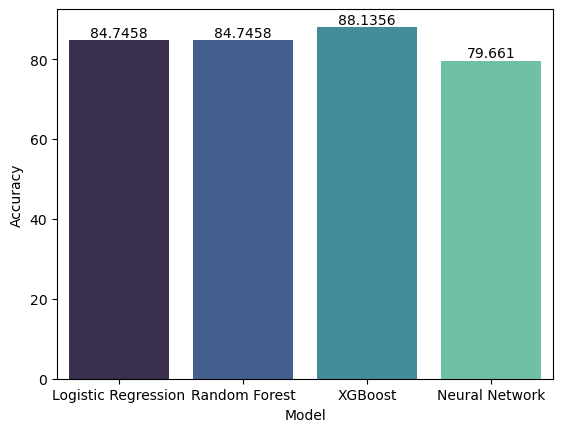

In [27]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Accuracy': [accuracy1*100, accuracy2*100, accuracy3*100, accuracy_dl*100]
})
ax=sns.barplot(data=results, x='Model',y ="Accuracy", palette="mako")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()